In [1]:
#cheking whether GPU is active or not
import tensorflow as tf
if tf.test.gpu_device_name():
    print('GPU is Present')
else:
    print("NO GPU")

GPU is Present


In [2]:
#making GPU to work for 50%
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
config=ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [3]:
#importing necessary libarires
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob


In [4]:
#image paths and size
image_size=[224,224]
train_path=r"D:\DL\Images\cotton_disease_images\Cotton Disease\train"
test_path=r"D:\DL\Images\cotton_disease_images\Cotton Disease\test"

In [5]:
#using VGG19 models with imagnet weights
#input layer is of our own image
#we will be using only the hiden layers but not input layer,dense,flatten layer si include_top=False
vgg19=VGG19(input_shape=image_size+[3],weights='imagenet',include_top=False)

In [7]:
#we will not train the model with all the weights so its is false
for layer in vgg19.layers:
    layer.trainable=False

In [8]:
#displaying the number of folders present
folders = glob(r"D:\DL\Images\cotton_disease_images\Cotton Disease\train\*")
folders

['D:\\DL\\Images\\cotton_disease_images\\Cotton Disease\\train\\diseased cotton leaf',
 'D:\\DL\\Images\\cotton_disease_images\\Cotton Disease\\train\\diseased cotton plant',
 'D:\\DL\\Images\\cotton_disease_images\\Cotton Disease\\train\\fresh cotton leaf',
 'D:\\DL\\Images\\cotton_disease_images\\Cotton Disease\\train\\fresh cotton plant']

In [9]:
#adding flatten layer to vgg16 output
x=Flatten()(vgg19.output)

In [10]:
#adding dense layer with 4 output classes and as it is classification we use softmax
prediction = Dense(len(folders), activation='softmax')(x)

In [11]:
#design the model with all the layers required
model = Model(inputs=vgg19.input, outputs=prediction)

In [12]:
#summary of the model
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [13]:
#compiling the model to train
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [14]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [15]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory(r"D:\DL\Images\cotton_disease_images\Cotton Disease\train",
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1951 images belonging to 4 classes.


In [16]:
# Make sure you provide the same target size as initialied for the image size
test_set = test_datagen.flow_from_directory(r"D:\DL\Images\cotton_disease_images\Cotton Disease\test",
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 106 images belonging to 4 classes.


In [17]:
# fit the model
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/10
61/61 [==============================] - 65s 1s/step - loss: 0.8062 - accuracy: 0.6945 - val_loss: 0.5518 - val_accuracy: 0.7453
Epoch 2/10
61/61 [==============================] - 61s 993ms/step - loss: 0.3646 - accuracy: 0.8590 - val_loss: 0.2270 - val_accuracy: 0.9151
Epoch 3/10
61/61 [==============================] - 60s 988ms/step - loss: 0.2774 - accuracy: 0.8908 - val_loss: 0.1752 - val_accuracy: 0.9245
Epoch 4/10
61/61 [==============================] - 60s 980ms/step - loss: 0.2250 - accuracy: 0.9129 - val_loss: 0.1617 - val_accuracy: 0.9340
Epoch 5/10
61/61 [==============================] - 62s 1s/step - loss: 0.1558 - accuracy: 0.9472 - val_loss: 0.1251 - val_accuracy: 0.9340
Epoch 6/10
61/61 [==============================] - 60s 990ms/step - loss: 0.1487 - accuracy: 0.9457 - val_loss: 0.2815 - val_accuracy: 0.8962
Epoch 7/10
61/61 [==============================] - 60s 981ms/step - loss: 0.1407 - accuracy: 0.9523 - val_loss: 0.0873 - val_accuracy: 0.9717
Epoch

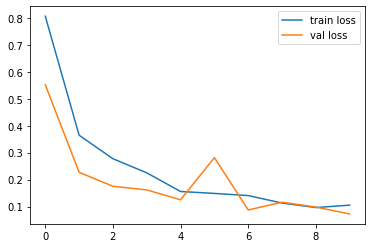

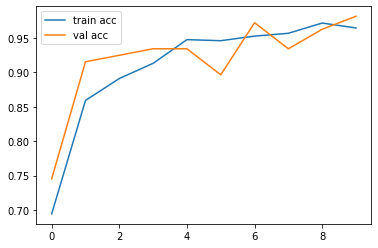

In [18]:
#plotting loss vs val_loss
#plotting accuracy vs val_accuracy
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()


# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()


In [19]:
#predicting the output
import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img(r"D:\DL\Images\cotton_disease_images\Cotton Disease\test\diseased cotton plant\dd (500)_iaip.jpg", target_size = (224,224))
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)

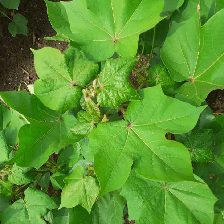

In [20]:
test_image = image.load_img(r"D:\DL\Images\cotton_disease_images\Cotton Disease\test\diseased cotton plant\dd (500)_iaip.jpg", target_size = (224,224))
test_image

In [21]:
result=np.where(result==result.max())[1][0]
result

1

In [22]:
#displaying the output of the image that is passed
if result==0:
    print("Diseased Cotton Leaf")
elif result==1:
    print("Diseased Cotton Plant")
elif result==2:
    print('Fresh Cotton leaf')
else:
    print("Fresh Cotton Plant")

Diseased Cotton Plant
